In [1]:
from algorithms.sat_heuristic import Sat
from tools.generator import Generator
from tools.tokenizer import Tokenizer
import tools.files as files

In [14]:
expression = '(a or not b or c) and (not a or b or not c)'

gen = Generator(clause_count=150, literals_per_clause=3, variable_count=150, var_name='x')

expression = gen.generate()

tokenizer = Tokenizer(expression)
_, var_names = tokenizer.tokenize()
clauses = tokenizer.get_clauses()

#print('Expresion:', expression)

#print('\nClausulas:', clauses)
#print('\nVariables de la expresion:', var_names)

tokenizer.tokenize_clause(clauses[0])

['x123', 'x29', 'x9']

In [13]:
sat = Sat(var_names, clauses, individuals=30, mutation_p=0.15, crossover_p=0.6, generations=100)

results_sat, time = sat.sat_algorithm()

print('\nExecution time {} seconds'.format(time))

if sat.fitness(results_sat[0]) == 0:
        print('\nsolucion optima:\n')
else:
        print('\nMejor solucion encontrada:\n')

print(results_sat[0])

. Generation 0, Minimum Fitness = 5, time = 0.09204179999960616
. Generation 1, Minimum Fitness = 4, time = 0.1756959999997889
. Generation 2, Minimum Fitness = 2, time = 0.2582855999999083
. Generation 3, Minimum Fitness = 2, time = 0.33911159999979645
. Generation 4, Minimum Fitness = 2, time = 0.4166115999996691
. Generation 5, Minimum Fitness = 2, time = 0.48526459999993676
. Generation 6, Minimum Fitness = 1, time = 0.5507729999999356
. Generation 7, Minimum Fitness = 1, time = 0.6268417999999656
. Generation 8, Minimum Fitness = 1, time = 0.69729499999994
. Generation 9, Minimum Fitness = 1, time = 0.7790439000000333
. Generation 10, Minimum Fitness = 0, time = 0.8463074999999662

Execution time 0.8764621999998781 seconds

Mejor solucion encontrada:

{'x1': 1, 'x10': 0, 'x11': 1, 'x12': 1, 'x13': 1, 'x14': 1, 'x15': 1, 'x16': 0, 'x17': 0, 'x18': 1, 'x19': 0, 'x2': 1, 'x20': 1, 'x21': 0, 'x22': 1, 'x23': 1, 'x24': 1, 'x25': 1, 'x26': 1, 'x27': 0, 'x28': 0, 'x29': 1, 'x3': 0, 'x30'

In [2]:
files.reset_result("result_sat_heuristico")

for n in range(3, 23):

    gen = Generator(clause_count=n, literals_per_clause=3, variable_count=n, var_name='x')
    expression = gen.generate()

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()
    clauses = tokenizer.get_clauses()

    print('Evaluating {} variables...'.format(n))

    sat = Sat(var_names, clauses, individuals=30, mutation_p=0.15, crossover_p=0.6, generations=100)
    _, time = sat.sat_algorithm(verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result("result_sat_heuristico", result)

print("\nEnd!")

Evaluating 3 variables...
Evaluating 4 variables...
Evaluating 5 variables...
Evaluating 6 variables...
Evaluating 7 variables...
Evaluating 8 variables...
Evaluating 9 variables...
Evaluating 10 variables...
Evaluating 11 variables...
Evaluating 12 variables...
Evaluating 13 variables...
Evaluating 14 variables...
Evaluating 15 variables...
Evaluating 16 variables...
Evaluating 17 variables...
Evaluating 18 variables...
Evaluating 19 variables...
Evaluating 20 variables...
Evaluating 21 variables...
Evaluating 22 variables...

End!


In [7]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecución en segundos')

    plt.suptitle('Crecimiento del costo temporal')
    
    plt.savefig('tools/results/sat_heuristico.png', dpi=600)

    plt.show()

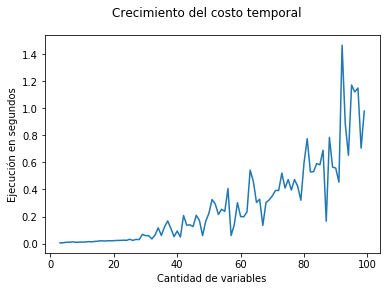

In [9]:
# Leo los resultados y los grafico

results = files.read_result("result_sat_heuristico")

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]))

plot_historic(nodes, times)